### importing the required libraries

In [1]:
!pip install pandas
!pip install seaborn
!pip install contractions
!pip install nltk
!pip install unidecode
!pip install scikit-learn
!pip install numpy

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style(style="whitegrid")
import matplotlib.pyplot as plt
import nltk
# import ssl
# try:
#    _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#    pass
# else:
#    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import re
import contractions
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import numpy as np






[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/onkars/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/onkars/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/onkars/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/onkars/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### creating a dataframe from imported dataset

In [3]:
filePath = r"../dataset/ESWA20_manualclassification.csv"

In [4]:
df = pd.read_csv(filePath, encoding='ISO-8859-1')

df

,Commit Message,Category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external
...,...,...
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell


In [5]:
df['commit_message'] = df['Commit Message']
del df['Commit Message']

df['category'] = df['Category']
del df['Category']

df

,commit_message,category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external
...,...,...
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell


### understanding the dataset

In [6]:
df.shape

(1740, 2)

There are 1740 records and 2 features in the dataset (including the target feature)

In [7]:
df.dtypes

commit_message    object
category          object
dtype: object

both the features have object as a data type

In [8]:
df.head()

,commit_message,category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external


In [9]:
df.tail()

,commit_message,category
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell
1739, changed render routine for text fields  added tabbing abilities to CustomScreen  various modifications on CustomScreen to match the new TextField requirements  changed size of PacketSky,internal


In [10]:
df.sample(5)

,commit_message,category
1696,revamped inheritance lookup,internal
1713,the processOccurence method is splitted into two for better modularity.,external
1271,Traceability has no API,external
690,HAMA-822: Add feature transformer interface to improve the power and flexibility of existing machine learning model\n\ngit-svn-id: https://svn.apache.org/repos/asf/hama/trunk@1548171 13f79535-47bb-0310-9956-ffa450edef68\n,functional
343,Bug 428427 - introduced ResourceBundleProvider to increase extensibility for loading resource bundles,external


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   commit_message  1740 non-null   object
 1   category        1740 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB


### EDA

In [12]:
df.describe(include='object')

,commit_message,category
count,1740,1740
unique,1716,5
top,Removed duplicate code and added outlines for how to add version to the start log entry.,functional
freq,3,348


In [13]:
df.category.unique()

array(['functional', 'bugfix', 'code smell', 'external', 'internal'],
      dtype=object)

In [14]:
print("The sum of duplicate records is ")
df.duplicated().sum()


The sum of duplicate records is 


19

In [15]:
# removing the duplicates

df = df.drop_duplicates()

df.count()

commit_message    1721
category          1721
dtype: int64

In [16]:
# checking for null values

df.isnull().sum()

commit_message    0
category          0
dtype: int64

In [17]:
# checking for NaN values

df.isna().sum()

commit_message    0
category          0
dtype: int64

In [18]:
# checking for records with only spaces in the commit_message columns

only_spaces_count = df['commit_message'].apply(lambda x: x.isspace() if pd.notnull(x) else False).sum()

only_spaces_count


0

In [19]:
df.count(), df.nunique()

(commit_message    1721
 category          1721
 dtype: int64,
 commit_message    1716
 category             5
 dtype: int64)

### found out the data descrepancy

the total records are 1721 and the unique records are 1716 and 5 in columns commit_messages and categories, respectively

I have done the root-cause analysis of this issue, to determine whether to keep the record or remove it completely

In [20]:

duplicate_records = df[df['commit_message'].duplicated(keep=False)]

duplicate_records

# 508, 796, 862, 1242, 1346

,commit_message,category
508,Enhanced tool palette composition functionality. Added Morph Activity/Gateway features.,internal
509,Enhanced tool palette composition functionality. Added Morph Activity/Gateway features.,external
796,Issue 176: size can now test compatibility with images; refactored vcloud config logic; updated to support latest bluelock,internal
797,Issue 176: size can now test compatibility with images; refactored vcloud config logic; updated to support latest bluelock,external
862,Make bitcoinSerialize() return a copy by default provide an unsafeBitcoinSerialize() method for high performance applications that are willing to deal with the extra API complexity.,internal
863,Make bitcoinSerialize() return a copy by default provide an unsafeBitcoinSerialize() method for high performance applications that are willing to deal with the extra API complexity.,external
1241,StewartSingularValueDecomposition: re-factor monolithic code and ugly switch statement into multiple methods,internal
1242,StewartSingularValueDecomposition: re-factor monolithic code and ugly switch statement into multiple methods,code smell
1346,"[BACKLOG-4709] - Small changes in platform to improve performance - UserSettingService - replace keySet() + get() combination with entrySet() - remove useless object instantiation - remove useless explicit map.remove() - AbstractSpringPentahoObjectFactory - add logger.isDebugEnabled() - remove useless non-null validation - OrderedApplicationEventMulticaster - replace ArrayList with array for faster sorting - extract stateless Comparator to a final field to avoid useless instantiation - replace new Integer.compareTo() with Integer.compare() - add tests - RoleAuthorizationPolicy - create ArrayLists of exact size - JcrRepositoryFileAclUtils - iterate through List not Set - DefaultPermissionConversionHelper - replace indexOf("":"") with indexOf(':') as it is more effective - AuditConnection - change the order: first try to obtain a connection and only then sleep",internal
1347,"[BACKLOG-4709] - Small changes in platform to improve performance - UserSettingService - replace keySet() + get() combination with entrySet() - remove useless object instantiation - remove useless explicit map.remove() - AbstractSpringPentahoObjectFactory - add logger.isDebugEnabled() - remove useless non-null validation - OrderedApplicationEventMulticaster - replace ArrayList with array for faster sorting - extract stateless Comparator to a final field to avoid useless instantiation - replace new Integer.compareTo() with Integer.compare() - add tests - RoleAuthorizationPolicy - create ArrayLists of exact size - JcrRepositoryFileAclUtils - iterate through List not Set - DefaultPermissionConversionHelper - replace indexOf("":"") with indexOf(':') as it is more effective - AuditConnection - change the order: first try to obtain a connection and only then sleep",external


**508, 509**: maybe new functionality, thus **internal** seems correct as it does not specifically mention fixing bugs or issues.

**796, 797**: seems like internal enhancements and updates to existing systems, so **internal** 

**862, 863**: change in functionality to enhance performance and security, so **internal**

**1241, 1242**: This is clearly a code maintenance task, thats why the **code smell** category

**1346, 1347**: If "external" refers to changes that affect end-users or outside systems, and "internal" refers to changes within the codebase that do not affect external interfaces, then it's likely that both should be categorized as **internal**.

In [21]:
df = df.drop(labels=[509, 797, 863, 1241, 1347], axis=0)

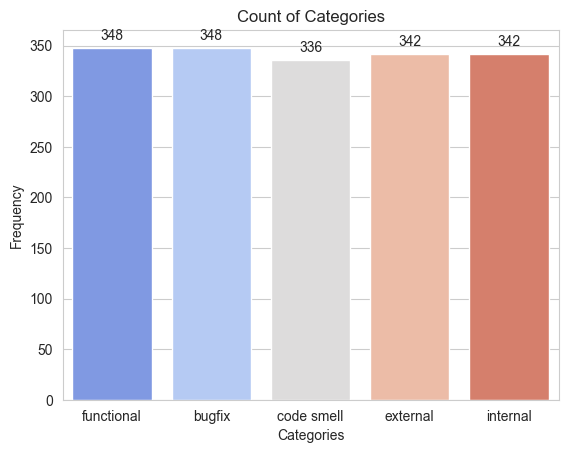

In [22]:
ax = sns.countplot(x=df.category, data=df, palette='coolwarm', hue=df.category, legend=False)

plt.title('Count of Categories')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# annotate each bar with the number of occurences
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', # The number to annotate
        (p.get_x() + p.get_width() / 2., p.get_height()), # Position
        ha = 'center', # center horizontally
        va = 'center', # center vertically
        xytext = (0, 9), # Text offset
        textcoords = 'offset points')

plt.show()

### Text Pre-processing

In [23]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Normalize accents and special characters
    text = unidecode.unidecode(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove single-character tokens (mostly punctuation)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Trim leading and trailing whitespace
    text = text.strip()
    
    return text



In [24]:
stop_words = set(stopwords.words('english'))

custom_stop_words = ['git', 'svn', 'refactor', 'gitsvnid', 'signedoffby', 'reviewedon', 'testedby', 'us', 'id', 'changeid', 'lot', 'small', 'thing', 'way'] # Add more custom words here --- lots
stop_words.update(custom_stop_words)

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)


In [25]:
df['commit_message_clean'] = df['commit_message'].apply(clean_text)
df['commit_message_clean'] = df['commit_message_clean'].apply(remove_stopwords)


In [26]:
df['tokens'] = df['commit_message_clean'].apply(word_tokenize)
df['pos_tags'] = df['tokens'].apply(pos_tag)

In [27]:
lemmatizer = WordNetLemmatizer()

# Function to map NLTK position tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if unknown

# Lemmatize a sentence with the appropriate POS tag
def lemmatize_with_pos(sentence):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in sentence]

# Apply the lemmatization function to the pos tags
df['lemmatized'] = df['pos_tags'].apply(lemmatize_with_pos)


In [28]:
df['lemmatized_text'] = df['lemmatized'].apply(' '.join)


In [29]:
df = df[['lemmatized_text', 'category']]

df

,lemmatized_text,category
0,nio read write complete caller would compatible old interface functionality connection instance object receive data message multiple opread event,functional
1,temporary fix nonshared jarray object add generic unittests check jcclucenesolrmontysolr functionality write unittest newseman complete processing python side remain call java decide proper behaviour case token addedgrouped,bugfix
2,java add rcon functionality source server add steamcondensersteampacketsrcon package add rconauthrequestpacket add rconauthresponsepacket add rconexecrequestpacket add rconexecresponsepacket add rconpacket added rconnoauthexception split steamsocket querysocket rconsocket stub functionality goldsrc server goldsrc use udp need special implementation add test,functional
3,merge change pullrequest fix aggregation generation cleanup dead code update dependency version,code smell
4,bug api builder performance bad incremental build,external
...,...,...
1735,work introduce getspecialfeaturecollection method general get printtemplatefeatures improve number,functional
1736,work next step move calculation handle printtemplatefeature handle multiple templateprinting creation still basic though,functional
1737,work generalize adjustmapforprintingtemplates ensurevisibilityofprintingtemplates method adjustmapforspecialfeatureclasses ensurevisibilityofspecialfeatures,functional
1738,work test coverage minor tweak remove dead code fix minor bug add test,code smell


### Data Review and Cleaning Reiteration

In [30]:
df['lemmatized_text'] = df['lemmatized_text'].apply(clean_text)
df['lemmatized_text'] = df['lemmatized_text'].apply(remove_stopwords)

In [31]:
df = df.drop_duplicates()

In [32]:
df.isnull().count()

lemmatized_text    1701
category           1701
dtype: int64

In [33]:
df = df.dropna(how='all')

In [34]:
df.count()

lemmatized_text    1701
category           1701
dtype: int64

In [35]:
df['lemmatized_text'].duplicated().sum()


1

In [36]:
duplicate_records = df[df['lemmatized_text'].duplicated(keep=False)]

duplicate_records 

,lemmatized_text,category
577,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,bugfix
578,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,external



**577, 578**: use of the word "Fix" suggests that it is **bugfix** entry, as it address a performance issue.

In [37]:
df = df.drop(labels=[578], axis=0)

In [38]:
# function that checks if a cell is only space characters
def is_only_spaces(x):
    return isinstance(x, str) and x.strip() == ''

# Apply the function to each element of the DataFrame
spaces_mask = df.map(is_only_spaces)

# all() to check if all values in each column are True (only spaces)
columns_only_spaces = spaces_mask.all()

print(columns_only_spaces)

columns_with_only_spaces = columns_only_spaces[columns_only_spaces].index.tolist()
print(columns_with_only_spaces)


lemmatized_text    False
category           False
dtype: bool
[]


In [39]:
df.count()

lemmatized_text    1700
category           1700
dtype: int64

### Training/Testing Split

In [40]:
X = df['lemmatized_text']  
y = df['category']    


x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 25% of the data will be allocated to the test set
    stratify=y,           # Stratify based on the labels to maintain distribution
    random_state=1234      
)


In [41]:
category_counts = y_test.value_counts()

print("The count of commit messages as per the category in testing dataset- ")
print(category_counts)


The count of commit messages as per the category in testing dataset- 
category
bugfix        87
internal      86
functional    86
external      85
code smell    81
Name: count, dtype: int64


In [42]:
category_counts = y_train.value_counts()

print("The count of commit messages as per the category in training dataset- ")
print(category_counts)

The count of commit messages as per the category in training dataset- 
category
bugfix        261
functional    260
internal      256
external      255
code smell    243
Name: count, dtype: int64


In [43]:
x_train_path = r"../dataset/x_train.csv"

x_train.to_csv(x_train_path, index=False)

In [44]:
y_train_path = r"../dataset/y_train.csv"

y_train.to_csv(y_train_path, index=False)

In [45]:
x_test_path = r"../dataset/x_test.csv"

x_test.to_csv(x_test_path, index=False)

In [46]:
y_test_path = r"../dataset/y_test.csv"

y_test.to_csv(y_test_path, index=False)

In [47]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=75000)

# Fit and transform the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Only transform the testing data
x_test_tfidf = vectorizer.transform(x_test)

In [48]:
!pip install keras

In [49]:
!pip install tensorflow

In [50]:
!pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [51]:
import distutils

In [52]:
from tensorflow.keras.layers import Dropout, Dense, GRU, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [53]:
x_train_tfidf

<1275x49445 sparse matrix of type '<class 'numpy.float64'>'
	with 66952 stored elements in Compressed Sparse Row format>

In [54]:
def loadData_Tokenizer(x_train, x_test, MAX_NB_WORDS=75000, MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((x_train, x_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(x_train), ]
    X_test = text[len(x_train):, ]
    embeddings_index = {}
    f = open(".\\Glove\\glove.6B.50d.txt", encoding="utf8")
    for line in f:

        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)

In [55]:
def Build_Model_RNN_Text(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
    word_index in word index ,
    embeddings_index is embeddings index, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """

    model = Sequential()
    hidden_layer = 3
    gru_node = 32

    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))


    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(nclasses, activation='softmax'))


    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['f1_score'])
    return model

In [56]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(x_train,x_test)


model_RNN = Build_Model_RNN_Text(word_index,embeddings_index, 20)

model_RNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=10,
                              batch_size=128,
                              verbose=2)

predicted = model_RNN.predict_classes(X_test_Glove)

print(metrics.classification_report(y_test, predicted))

Found 7153 unique tokens.
(1700, 500)


FileNotFoundError: [Errno 2] No such file or directory: '.\\Glove\\glove.6B.50d.txt'